#%% [markdown]

# 1. 加载数据

In [ ]:
#%% code

# 加载苹果公司数据作为示例
df = pd.read_csv('../data/AAPL_data.csv', index_col=0, parse_dates=True)
df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-28,221.67,223.81,217.6800,217.90,39818617.0
2025-03-27,221.39,224.99,220.5601,223.85,37094774.0
2025-03-26,223.51,225.02,220.4700,221.53,34532656.0
2025-03-25,220.77,224.10,220.0800,223.75,34493583.0
2025-03-24,221.00,221.48,218.5800,220.73,44299483.0


#%% [markdown]

# 2. 计算技术指标

In [ ]:
#%% code

# 计算MACD
macd = calculate_macd(df['4. close'])

# 计算RSI
rsi = calculate_rsi(df['4. close'])

# 计算布林带
bb = calculate_bollinger_bands(df['4. close'])

print('MACD指标示例：')
print(macd.head())
print('\nRSI指标示例：')
print(rsi.head())
print('\n布林带指标示例：')
print(bb.head())

MACD指标示例：
                MACD    Signal  Histogram
date                                     
2025-03-28  0.000000  0.000000   0.000000
2025-03-27  0.474644  0.094929   0.379715
2025-03-26  0.656036  0.207150   0.448885
2025-03-25  0.967769  0.359274   0.608495
2025-03-24  0.960065  0.479432   0.480633

RSI指标示例：
date
2025-03-28   NaN
2025-03-27   NaN
2025-03-26   NaN
2025-03-25   NaN
2025-03-24   NaN
Name: 4. close, dtype: float64

布林带指标示例：
            Upper  Middle  Lower
date                            
2025-03-28    NaN     NaN    NaN
2025-03-27    NaN     NaN    NaN
2025-03-26    NaN     NaN    NaN
2025-03-25    NaN     NaN    NaN
2025-03-24    NaN     NaN    NaN


#%% [markdown]

# 3. 可视化技术指标

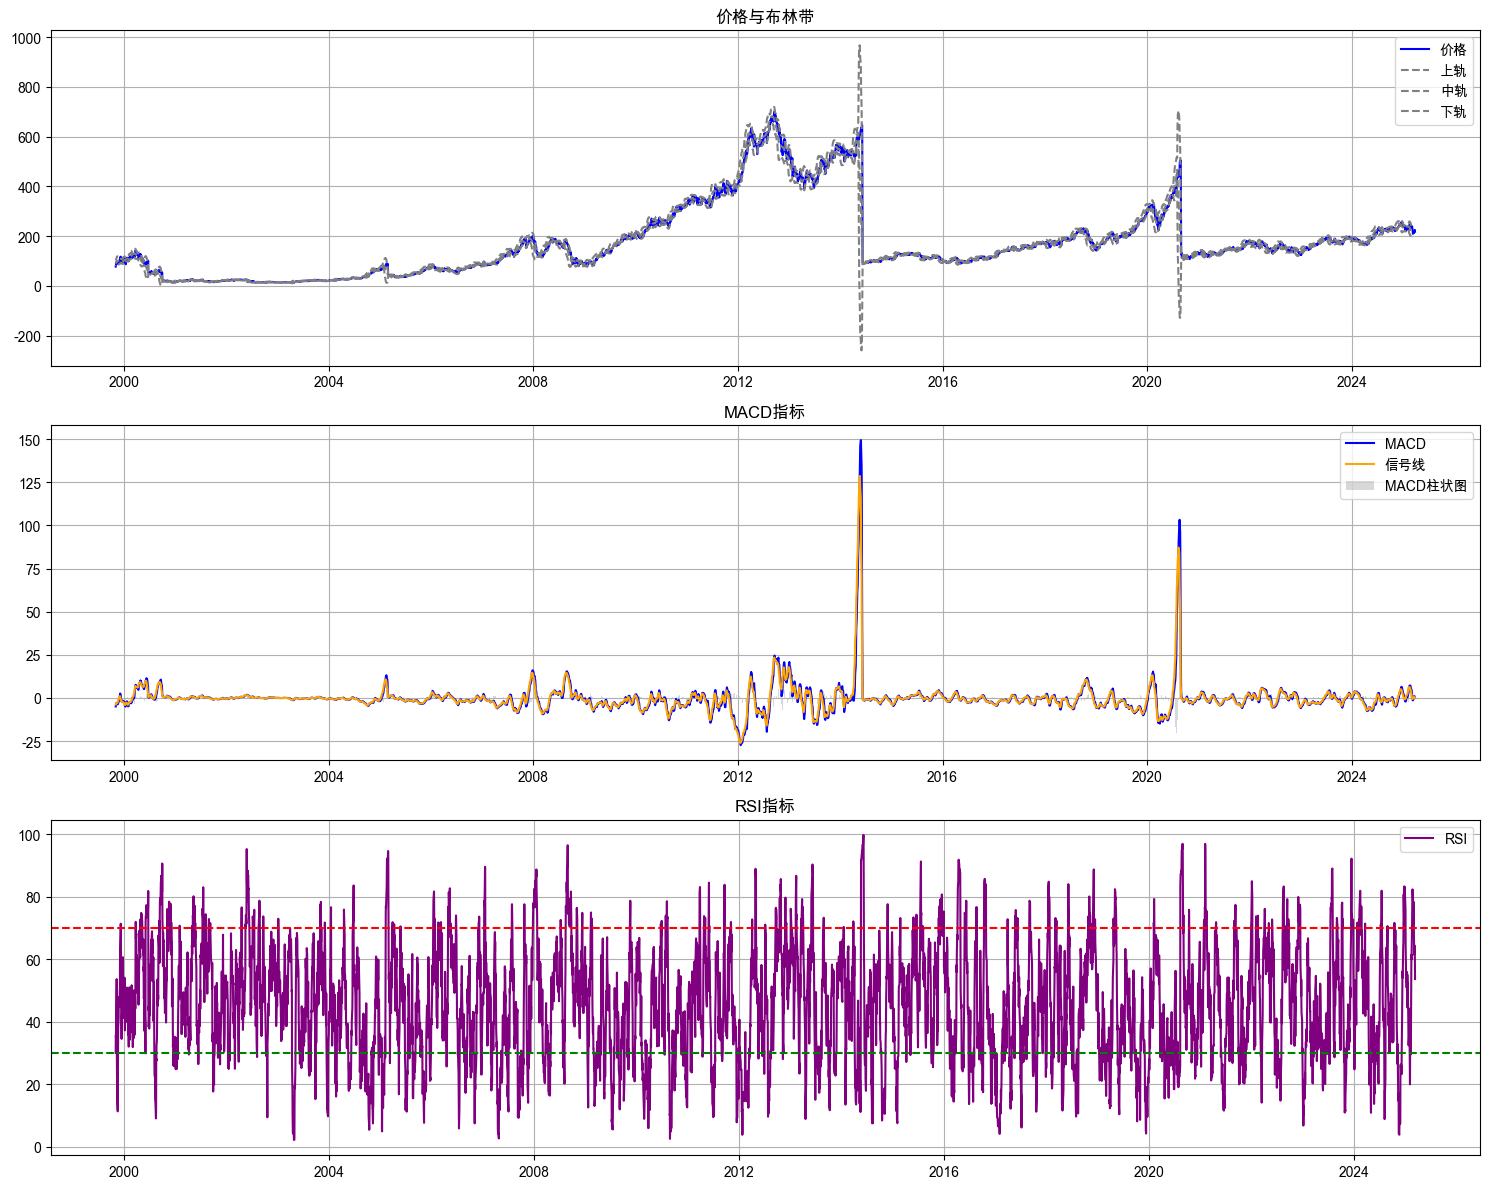

In [ ]:
#%% code

# 创建子图
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# 绘制价格和布林带
ax1.plot(df.index, df['4. close'], label='价格', color='blue')
ax1.plot(bb.index, bb['Upper'], '--', label='上轨', color='gray')
ax1.plot(bb.index, bb['Middle'], '--', label='中轨', color='gray')
ax1.plot(bb.index, bb['Lower'], '--', label='下轨', color='gray')
ax1.set_title('价格与布林带')
ax1.legend()
ax1.grid(True)

# 绘制MACD
ax2.plot(macd.index, macd['MACD'], label='MACD', color='blue')
ax2.plot(macd.index, macd['Signal'], label='信号线', color='orange')
ax2.bar(macd.index, macd['Histogram'], label='MACD柱状图', color='gray', alpha=0.3)
ax2.set_title('MACD指标')
ax2.legend()
ax2.grid(True)

# 绘制RSI
ax3.plot(rsi.index, rsi, label='RSI', color='purple')
ax3.axhline(y=70, color='r', linestyle='--')
ax3.axhline(y=30, color='g', linestyle='--')
ax3.set_title('RSI指标')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()